# Classification with Deep Neural Networks

Before proceeding -  You can solve this pistachio classification problem easily using classical machine learning techniques without the need for a deep learning model. This is an easy to understand, structured dataset which can be used to demonstrate the principles of neural networks. 

PyTorch is a framework for creating machine learning models, including deep neural networks (DNNs). In this example, we'll use PyTorch to create a simple neural network that classifies pistachio's into classes (types) based on a bunch of input features that are known. The dataset used can be found on Kaggle. with minor modifications, this code by be run on other datasets too.

> Dataset: https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset

In [2]:
import pandas as pd
import numpy as np
import torch

# Choose the appropriate device based on availability (CUDA or CPU)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # For Windows
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # For M1 Mac
print(f"Using device: {device}")

# Open the datafile
pistachio = pd.read_excel('pistachio.xlsx')
pistachio.head()


Using device: mps


,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [3]:
# Remove NA's
pistachio.dropna(inplace=True)
pistachio.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [4]:
features = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']
label = ['Class']

X = pistachio[features].values
y = pistachio[label].values


## Optional - Synthetic data creation
In case the input data is small, you can create synthetic data using knn. It purely depends on the dataset. In our case, we are going to skip it, however the code is there for future use. Note that this is not SMOTE as we are not trying to handle class imbalance.


In [5]:
from sklearn.neighbors import NearestNeighbors

def generate_synthetic_data(X, y, k=5, synthetic_ratio=1.0):
    """
    Generate synthetic data using the KNN algorithm.
    
    Args:
        X (numpy.ndarray): Original dataset.
        y (numpy.ndarray): Original target labels.
        k (int): Number of nearest neighbors to consider.
        synthetic_ratio (float): Ratio of synthetic data to generate.
        
    Returns:
        numpy.ndarray: Synthetic data.
        numpy.ndarray: Synthetic target labels.
    """
    # Fit the KNN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    
    # Get the number of synthetic data points to generate
    n_synthetic = int(X.shape[0] * synthetic_ratio)
    
    # Initialize synthetic data arrays
    X_synthetic = np.zeros((n_synthetic, X.shape[1]))
    y_synthetic = np.zeros(n_synthetic, dtype=np.int64)

    for i in range(n_synthetic):
        # Select a random data point
        idx = np.random.randint(X.shape[0])
        point = X[idx]
        
        # Find the k nearest neighbors
        distances, indices = knn.kneighbors([point], return_distance=True)
        
        # Generate a synthetic data point
        weights = distances[0] / np.sum(distances[0])
        weights = weights.reshape(-1, 1)  # Reshape weights to match the shape of data points
        X_synthetic[i] = np.sum(weights * X[indices[0]], axis=0)
     
        # Assign the target label based on majority voting from nearest neighbors
        neighbor_labels = y[indices[0]].flatten().astype(np.int64)
        y_synthetic[i] = np.argmax(np.bincount(neighbor_labels))

    return X_synthetic, y_synthetic[:, np.newaxis]


# Uncomment the section below if you want to create synthetic data
"""
# Generate synthetic data with k=3 and double the dataset size
X_synthetic, y_synthetic = generate_synthetic_data(X, y, k=3, synthetic_ratio=5.0)

# Combine the original and synthetic data along with target labels
X = np.concatenate((X, X_synthetic), axis=0)
y = np.concatenate((y, y_synthetic), axis=0)

print(f"Length of data before augmentation: {len(y)}\nLength of data after augmentation: {len(X)}")

"""

'\n# Generate synthetic data with k=3 and double the dataset size\nX_synthetic, y_synthetic = generate_synthetic_data(X, y, k=3, synthetic_ratio=5.0)\n\n# Combine the original and synthetic data along with target labels\nX = np.concatenate((X, X_synthetic), axis=0)\ny = np.concatenate((y, y_synthetic), axis=0)\n\nprint(f"Length of data before augmentation: {len(y)}\nLength of data after augmentation: {len(X)}")\n\n'

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scale numeric features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[:3]

array([[0.35650743, 0.37435926, 0.31583158, 0.41371302, 0.6579007 ,
        0.44081731, 0.6841071 , 0.37258179, 0.53967447, 0.25439734,
        0.29972439, 0.62652401, 0.24175824, 0.44827586, 0.55716912,
        0.66825145, 0.38877408, 0.22654734, 0.2100493 , 0.35148216,
        0.35216282, 0.31486874, 0.62936529, 0.59290566, 0.73980527,
        0.1807919 , 0.15840198, 0.14300697],
       [0.40923567, 0.57143035, 0.40842093, 0.40572381, 0.71593743,
        0.49473417, 0.70867109, 0.42368023, 0.63580875, 0.30700981,
        0.1893661 , 0.60238865, 0.21978022, 0.34482759, 0.53125   ,
        0.74484945, 0.7478386 , 0.59060006, 0.46009946, 0.79571073,
        0.70394652, 0.44064069, 0.40740058, 0.3541805 , 0.48941843,
        0.04403586, 0.04950844, 0.06919112],
       [0.46476645, 0.20465959, 0.59569329, 0.34882713, 0.83473135,
        0.54943851, 0.80864652, 0.44740488, 0.72609359, 0.46308307,
        0.61127699, 0.49937795, 0.23076923, 0.20689655, 0.42518382,
        0.84178553, 0.6231

In [7]:
# Label encode the target label
from sklearn.preprocessing import LabelEncoder

lblEncoder = LabelEncoder()
encoded_labels = lblEncoder.fit_transform(y.flatten())

## Training and Test sets

In [8]:
# Create train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, 
                                                    encoded_labels,
                                                    test_size=0.3,
                                                    random_state=42)

print(f"Length of training set: {len(X_train)}\nLength of test set: {len(X_test)}\n")


# Take a look at the first few training features and corresponding labels
for n in range(0,3):
    print(f"Features {X_train[n]}; Label: {y_train[n]} ({lblEncoder.classes_[y_train[n]]})\n")

Length of training set: 1503
Length of test set: 645

Features [0.54627389 0.12487622 0.48225173 0.44564623 0.71367037 0.62632399
 0.9950872  0.4643284  0.78611394 0.30472682 0.90560404 0.68897736
 0.14285714 0.20689655 0.62555147 0.97543582 0.73202545 0.67933516
 0.65634129 0.32793961 0.22213027 0.09127838 0.27571767 0.20404515
 0.47596829 0.36115492 0.28030131 0.2642088 ]; Label: 1 (Siirt_Pistachio)

Features [0.21968153 0.02350573 0.05310448 0.28796429 0.63704375 0.29012375
 0.82535004 0.1768719  0.71795524 0.23800135 0.82177308 0.71535208
 0.28571429 0.5862069  0.65514706 0.85155837 0.81412156 0.73885868
 0.66192776 0.81962407 0.82021064 0.61301668 0.2856729  0.24015527
 0.41826362 0.13379541 0.08953848 0.06940088]; Label: 0 (Kirmizi_Pistachio)

Features [0.50321656 0.1311682  0.55187265 0.37247497 0.80321922 0.58618407
 0.96782117 0.43036502 0.64979654 0.4131168  0.83681672 0.57800448
 0.18681319 0.17241379 0.50569853 0.95166403 0.82589874 0.74226633
 0.67467984 0.49788404 0.40746

In [9]:
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(42)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.2.1


## Prepare the data for PyTorch

PyTorch makes use of data loaders to load training and validation data in batches. We've already loaded the data into numpy arrays, but we need to wrap those in PyTorch datasets (in which the data is converted to PyTorch tensor objects) and create loaders to read batches from those datasets.

In [10]:
# Create dataloader 
batch_size = 16

# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(X_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(X_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


## Define a neural network

Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:

- An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a ReLU activation function.
- A hidden layer that receives ten inputs and applies a ReLU activation function.
- An output layer that generates a non-negative numeric output for each class (which a loss function will translate into classification probabilities for each of the possible target labels).

> Additional note: Even though we are using dropout, we are still calling it a fully connected layet. The presence or absence of dropout doesn't affect the fundamental definition of a fully connected layer. Dropout modifies the training process by temporarily disabling connections, promoting robustness.
> Here's an analogy: Imagine a fully connected layer as a densely woven net. Dropout is like temporarily removing some threads from the net during training. The overall structure remains a net, but it becomes less prone to getting stuck on specific connections. Therefore, you can absolutely call a layer with dropout a fully connected layer. The term "fully connected" refers to the overall architecture, while dropout addresses a specific training technique for regularisation.

In [11]:
# Number of hidden layer nodes
h1 = 40 # Size of first hidden layer
h2 = 16 # Size of second Hidden layer
n_classes = len(pistachio['Class'].unique())

# Define the neural network
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.fc1 = nn.Linear(len(features), h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, n_classes)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = CustomNet()
print(model)

CustomNet(
  (fc1): Linear(in_features=28, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Train the model

To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll create a function to train and optimize the model, and function to test the model. Then we'll call these functions iteratively over 50 epochs, logging the loss and accuracy statistics for each epoch.

In [15]:
# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

def train(model, data_loader, optimizer):
    """
    Train the model for one epoch.

    Args:
        model (nn.Module): The PyTorch model to train.
        data_loader (DataLoader): The DataLoader object containing training data.
        optimizer (Optimizer): The optimizer used to update model parameters.

    Returns:
        float: The average training loss for the epoch.
    """

    # Set the model to training mode (enables backpropagation)
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        target = target.view(-1) # Reshape target tensor to a 1D vector (needed for CrossEntropyLoss)

        
        #feedforward
        # 1. Clear gradients from previous iteration
        optimizer.zero_grad()

        # 2. Get the model's output for the current batch of data with a forward pass
        out = model(data)

        # 3. Calculate the loss based on the output and target labels
        loss = loss_criteria(out, target)

        # 4. Accumulate the loss for this batch
        train_loss += loss.item()


        #backpropagation
        # 1. Clear gradients from previous iteration (redundant but often included for clarity)
        # optimizer.zero_grad()

        # 2. Calculate gradients based on the loss (backpropagation)
        loss.backward()

        # 3. Update model parameters based on the calculated gradients using the optimizer
        optimizer.step()


    # Return average loss for the epoch
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    """
    Evaluate the model performance on the test set.

    Args:
        model (nn.Module): The PyTorch model to evaluate.
        data_loader (DataLoader): The DataLoader object containing test data.

    Returns:
        float: The average loss on the test set.
    """

    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            target = target.view(-1) # Reshape to 1D tensor
            
            # Forward pass:
            # Get the model's output for the current batch of data (no gradients calculated here)
            out = model(data)

            # Calculate loss
            test_loss += loss_criteria(out, target).item()

            # Calculate accuracy
            # 1. Get the index of the predicted class with the highest probability
            _, predicted = torch.max(out.data, 1)

            # 2. Count the number of correct predictions for this batch
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [16]:
# Use an "Adam" optimizer to adjust weights
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()


# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 0.672479
Validation set: Average loss: 0.653379, Accuracy: 372/645 (58%)

Epoch: 2
Training set: Average loss: 0.605502
Validation set: Average loss: 0.557633, Accuracy: 372/645 (58%)

Epoch: 3
Training set: Average loss: 0.524693
Validation set: Average loss: 0.497907, Accuracy: 372/645 (58%)

Epoch: 4
Training set: Average loss: 0.458276
Validation set: Average loss: 0.372296, Accuracy: 567/645 (88%)

Epoch: 5
Training set: Average loss: 0.358944
Validation set: Average loss: 0.298846, Accuracy: 565/645 (88%)

Epoch: 6
Training set: Average loss: 0.326848
Validation set: Average loss: 0.285405, Accuracy: 571/645 (89%)

Epoch: 7
Training set: Average loss: 0.320530
Validation set: Average loss: 0.275070, Accuracy: 573/645 (89%)

Epoch: 8
Training set: Average loss: 0.314409
Validation set: Average loss: 0.272456, Accuracy: 569/645 (88%)

Epoch: 9
Training set: Average loss: 0.306550
Validation set: Average loss: 0.279850, Accuracy: 560/645 (87%)

E

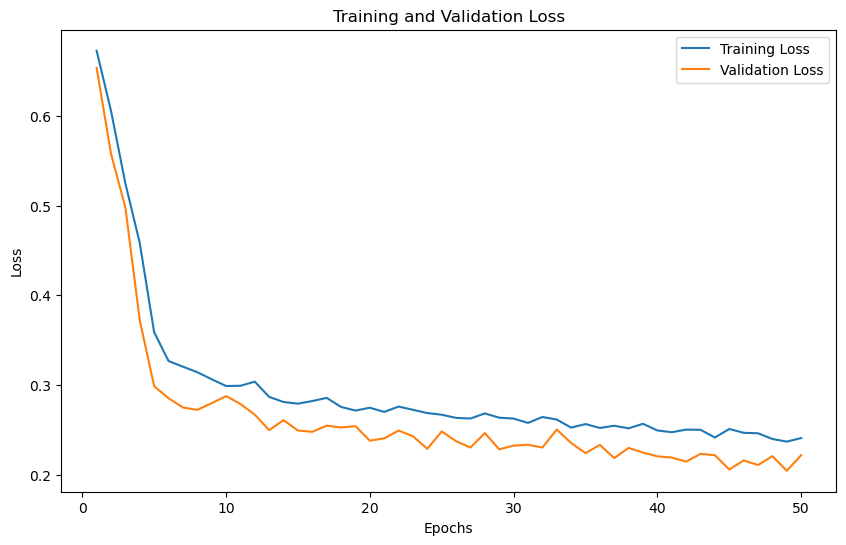

In [17]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot training and test loss curves
plt.plot(epoch_nums, training_loss, label='Training Loss')
plt.plot(epoch_nums, validation_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()


## View the learned weights and biases

In [18]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[ 0.2509032   0.21107586 -0.07974231 ... -0.26114383 -0.3722351
  -0.30913457]
 [-0.11859655 -0.24303307  0.18866381 ...  0.26120386  0.30563214
   0.22088315]
 [ 0.16667135  0.06528323  0.11214057 ... -0.37186933 -0.27463406
  -0.27176562]
 ...
 [ 0.2338875  -0.05431275 -0.04978249 ... -0.06926931 -0.13699119
  -0.02029369]
 [-0.16583651  0.07404808 -0.14822492 ... -0.18714125  0.07224572
   0.09469876]
 [-0.04225358  0.08845129  0.1441371  ... -0.08540227 -0.27556893
  -0.20223853]]
fc1.bias 
 [-0.11970788 -0.18082316  0.02730209 -0.1108679   0.15538001 -0.18901715
  0.07941814  0.1523977   0.09326046  0.05542241 -0.18182862  0.15378954
 -0.01410702 -0.18171223  0.17828968 -0.07911396 -0.02856853  0.15504146
 -0.13100262 -0.15948409  0.03073179 -0.02529601  0.04353051 -0.14476459
 -0.00375751 -0.07461395 -0.10541336 -0.17303911  0.10523573  0.00808954
 -0.16511922  0.10690406  0.02987975  0.03506815 -0.12737007  0.02924594
  0.17605166  0.10231331 -0.16940126  0.1490258

## Evaluate model metrics

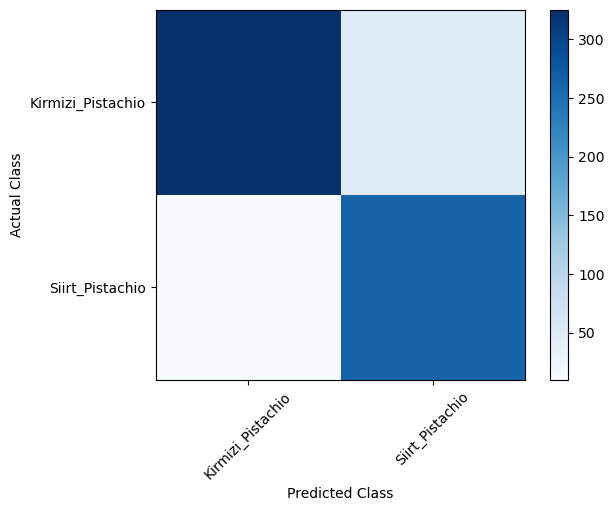

In [19]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(X_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, pistachio['Class'].unique(), rotation=45)
plt.yticks(tick_marks, pistachio['Class'].unique())
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## Use the trained model

In [21]:
# New penguin features
x_new = [[63595, 1369.751, 423.6082, 206.1729, 0.8736, 284.5552, 0.9024,
        70470, 0.7061, 2.0546, 0.4259, 0.6717, 0.0067, 0.0032, 0.4512,
        0.9271, 209.4306, 196.4069, 182.1488, 21.9079, 23.9084, 27.4557,
        -0.2867, -0.1523, 0.0097, 2.3468, 2.3649, 2.9335],
        [85313, 1171.661, 454.5264, 240.0397, 0.8492, 329.5814, 0.9883,
        86320, 0.7478, 1.8935, 0.7809, 0.7251, 0.0053, 0.0028, 0.5258,
        0.9956, 230.837, 227.2985, 205.2375, 22.2156, 24.1973, 28.5927,
        -0.9922, -0.8358, -0.585, 3.2778, 2.8746, 2.1257],
        [78993, 1217.459, 453.0873, 236.6473, 0.8528, 317.1388, 0.9219,
        85685, 0.6853, 1.9146, 0.6697, 0.7, 0.0057, 0.003, 0.4899, 0.938,
        220.1018, 212.3457, 199.255, 27.4514, 30.6533, 31.9937, -0.6034,
        -0.5681, -0.4568, 2.2715, 2.216, 2.095],
       [61816, 1103.546, 409.6489, 201.6053, 0.8705, 280.5469, 0.9454,
        65384, 0.6297, 2.0319, 0.6379, 0.6848, 0.0066, 0.0033, 0.469,
        0.953, 224.5366, 220.0017, 205.217, 25.1574, 29.8039, 22.9742,
        -0.8514, -0.936, -0.3995, 2.8476, 3.0277, 2.5362],
        [89599, 1222.901, 488.5881, 235.5899, 0.8761, 337.7588, 0.9919,
        90329, 0.6652, 2.0739, 0.7529, 0.6913, 0.0055, 0.0026, 0.4779,
        0.9911, 230.5634, 222.5081, 205.1139, 18.9445, 19.9413, 21.6879,
        -1.4702, -1.2808, -0.9437, 4.5565, 4.0812, 4.3488]]
i=1

# Set model to evaluation mode
model.eval()

# Preprocess the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(x_new)


# There could be multiple test values to predict, so x_new will be list of list
for x_arr in scaled_features:
    # Get a prediction for the new data sample
    x = torch.Tensor(x_arr).float()

    _, predicted = torch.max(model(x).unsqueeze(0), 1)

    print(f"Prediction for test record {i}: {lblEncoder.classes_[predicted.item()]}\n")
    i+=1

Prediction for test record 1: Kirmizi_Pistachio

Prediction for test record 2: Siirt_Pistachio

Prediction for test record 3: Kirmizi_Pistachio

Prediction for test record 4: Kirmizi_Pistachio

Prediction for test record 5: Kirmizi_Pistachio

